In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv("NLweather.csv")
data.tail(2)

,STATION,NAME,DATE,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
37773,CA008401500,"DEER LAKE, NL CA",2022-01-27,NaN,0.0,0.0,NaN,NaN,-9.5,NaN,NaN,NaN
37774,CA008401500,"DEER LAKE, NL CA",2022-01-28,NaN,0.0,0.0,0.0,-11.3,-2.0,-20.5,NaN,NaN


In [137]:
feature = ['STATION','NAME','DATE','TAVG', 'TMAX', 'TMIN','PRCP']
data = data[feature]

In [138]:
data.isnull().sum()

STATION        0
NAME           0
DATE           0
TAVG       17036
TMAX        1283
TMIN        1434
PRCP        3555
dtype: int64

In [139]:
data.dtypes

STATION     object
NAME        object
DATE        object
TAVG       float64
TMAX       float64
TMIN       float64
PRCP       float64
dtype: object

In [140]:
import datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data['month'] = data['DATE'].dt.month
data['year'] = data['DATE'].dt.year
data['day'] = data['DATE'].dt.day
summer = data[(data['month']>=6) & (data['month']<=8)]

In [141]:
summer.STATION.unique()

array(['CA008402450', 'CA008403399', 'CA008403603', 'CA008400601',
       'CA008401500'], dtype=object)

In [142]:
summer.NAME.unique()

array(['ISLE AUX MORTS, NL CA', 'ST ANTHONY, NL CA',
       'ST JOHNS WEST CLIMATE, NL CA', 'BONAVISTA, NL CA',
       'DEER LAKE, NL CA'], dtype=object)

In [143]:
summer.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,PRCP,month,year,day
151,CA008402450,"ISLE AUX MORTS, NL CA",1990-06-01,5.4,10.5,2.0,0.0,6,1990,1
152,CA008402450,"ISLE AUX MORTS, NL CA",1990-06-02,6.9,9.0,3.0,0.0,6,1990,2
153,CA008402450,"ISLE AUX MORTS, NL CA",1990-06-03,8.3,10.5,4.5,0.0,6,1990,3
154,CA008402450,"ISLE AUX MORTS, NL CA",1990-06-04,7.4,10.5,5.0,2.4,6,1990,4
155,CA008402450,"ISLE AUX MORTS, NL CA",1990-06-05,8.0,11.0,5.5,0.8,6,1990,5


In [144]:
summer.tail()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,PRCP,month,year,day
37625,CA008401500,"DEER LAKE, NL CA",2021-08-25,20.0,25.5,14.5,0.0,8,2021,25
37626,CA008401500,"DEER LAKE, NL CA",2021-08-26,19.8,25.0,14.5,0.0,8,2021,26
37627,CA008401500,"DEER LAKE, NL CA",2021-08-27,18.8,25.0,12.5,3.3,8,2021,27
37628,CA008401500,"DEER LAKE, NL CA",2021-08-28,15.3,19.5,11.0,0.0,8,2021,28
37629,CA008401500,"DEER LAKE, NL CA",2021-08-29,13.3,21.5,5.0,0.0,8,2021,29


'CA008402450' : ISLE AUX MORTS\
'CA008403399' : ST. ANTHONY\
'CA008403603' : ST JOHNS\
'CA008400601' : BONAVISTA\
'CA008401500' : DEER LAKE


In [145]:
summer.isnull().sum()

STATION       0
NAME          0
DATE          0
TAVG       4119
TMAX        213
TMIN        256
PRCP        753
month         0
year          0
day           0
dtype: int64

# available year data check for five different stations

In [149]:
isle = summer[summer['STATION'] == 'CA008402450']
st_johns = summer[summer['STATION'] == 'CA008403603']
deer = summer[summer['STATION'] == 'CA008400601']
bonavista = summer[summer['STATION'] == 'CA008401500']
st_anthony = summer[summer['STATION'] == 'CA008403399']

In [150]:
print('isle :' , isle['year'].unique())
print('\n')
print('st_johns :' , st_johns['year'].unique())
print('\n')
print('deer_lake :' , deer['year'].unique())
print('\n')
print('bonavista :' , bonavista['year'].unique())
print('\n')
print('st_anthony :' , st_anthony['year'].unique())

isle : [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


st_johns : [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


deer_lake : [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]


bonavista : [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]


st_anthony : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


Based on the available data in different stations : only isle will take 2012-2017, others will take 2012-2021 (ten years)

In [151]:
isle = isle[isle['year'] > 2011]
st_johns = st_johns[st_johns['year'] > 2011]
deer = deer[deer['year'] > 2011]
bonavista = bonavista[bonavista['year'] > 2011]
st_anthony = st_anthony[st_anthony['year'] > 2011]

# Temperature

## St Anthony

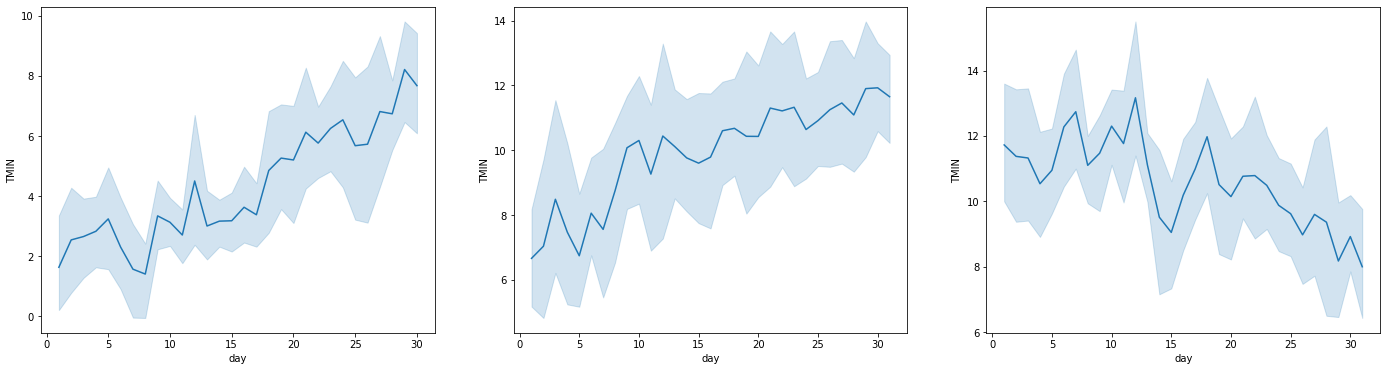

In [153]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMIN', data=st_anthony[(st_anthony['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMIN', data=st_anthony[(st_anthony['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMIN', data=st_anthony[(st_anthony['month']==8)])

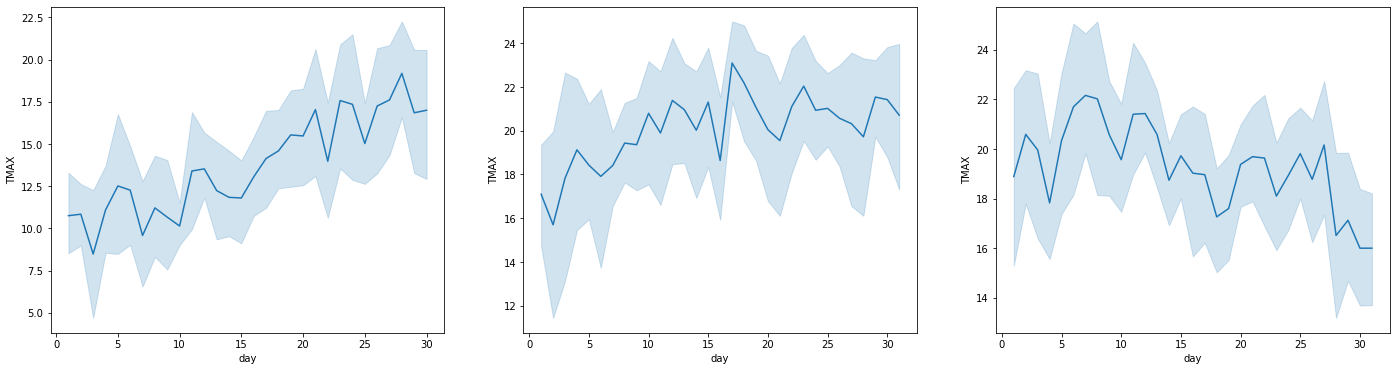

In [154]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMAX', data=st_anthony[(st_anthony['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMAX', data=st_anthony[(st_anthony['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMAX', data=st_anthony[(st_anthony['month']==8)])

## Deer Lake

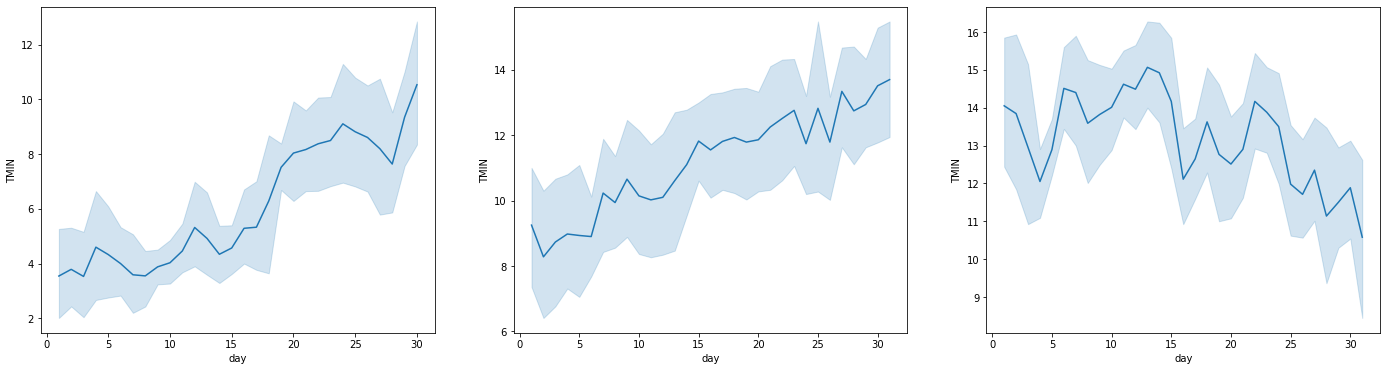

In [156]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMIN', data=deer[(deer['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMIN', data=deer[(deer['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMIN', data=deer[(deer['month']==8)])

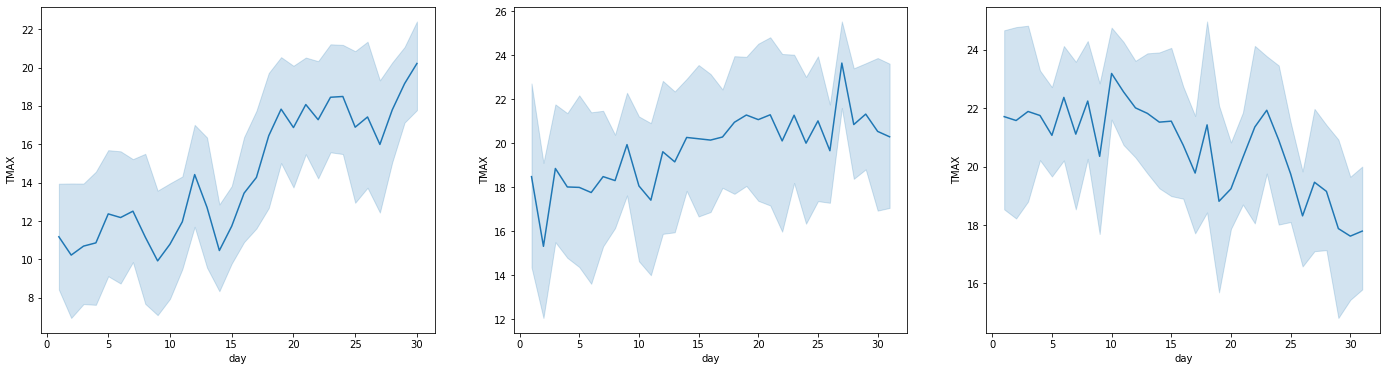

In [157]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMAX', data=deer[(deer['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMAX', data=deer[(deer['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMAX', data=deer[(deer['month']==8)])

## ISLE AUX MORTS

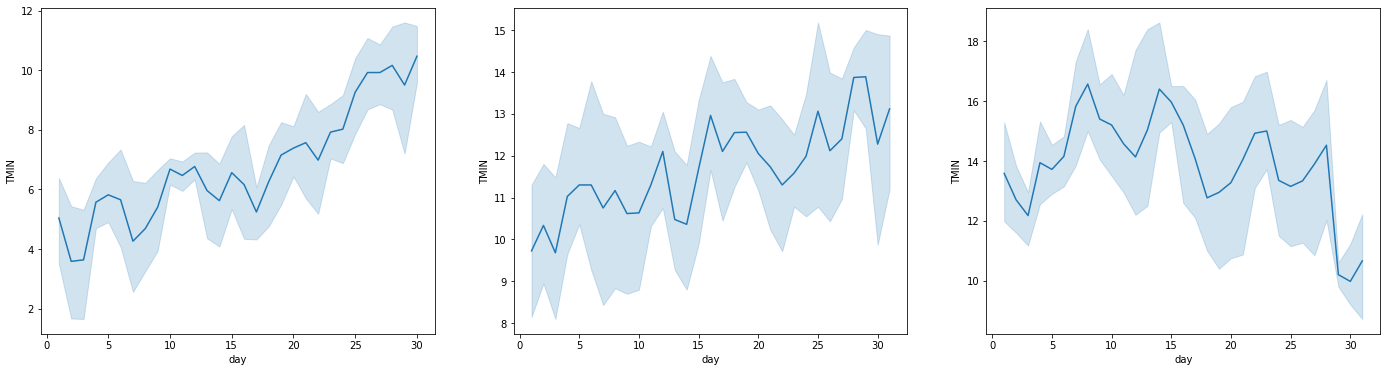

In [158]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMIN', data=isle[(isle['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMIN', data=isle[(isle['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMIN', data=isle[(isle['month']==8)])

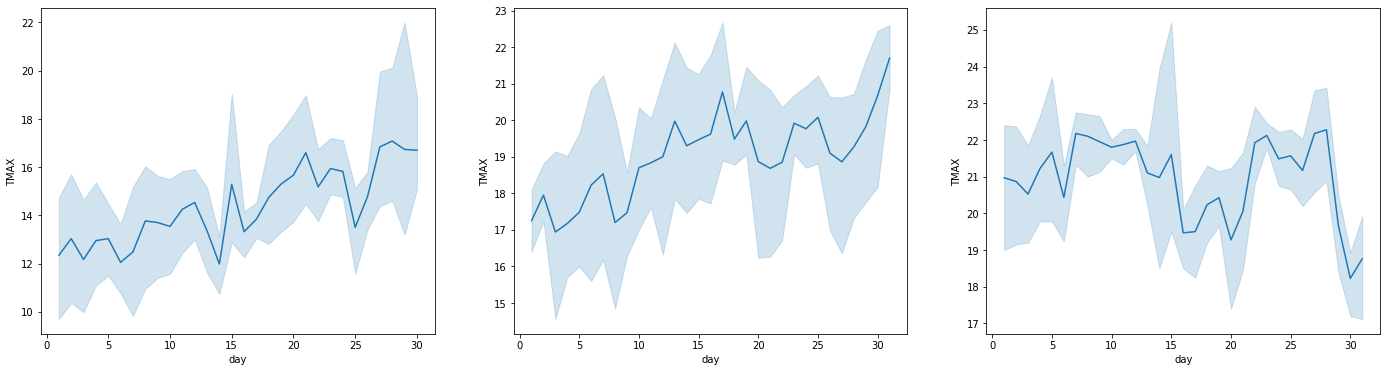

In [159]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMAX', data=isle[(isle['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMAX', data=isle[(isle['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMAX', data=isle[(isle['month']==8)])

## Bonavista

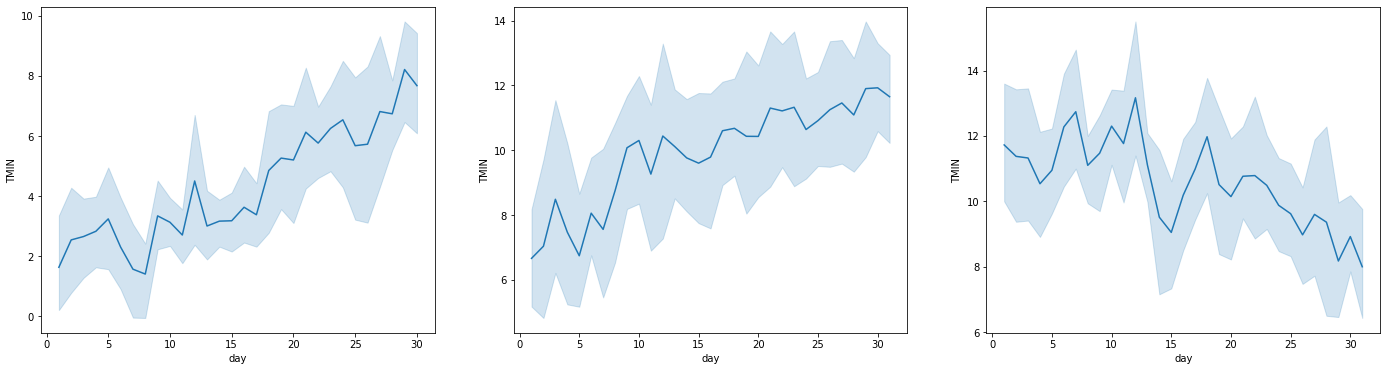

In [153]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMIN', data=bonavista[(bonavista['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMIN', data=bonavista[(bonavista['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMIN', data=bonavista[(bonavista['month']==8)])

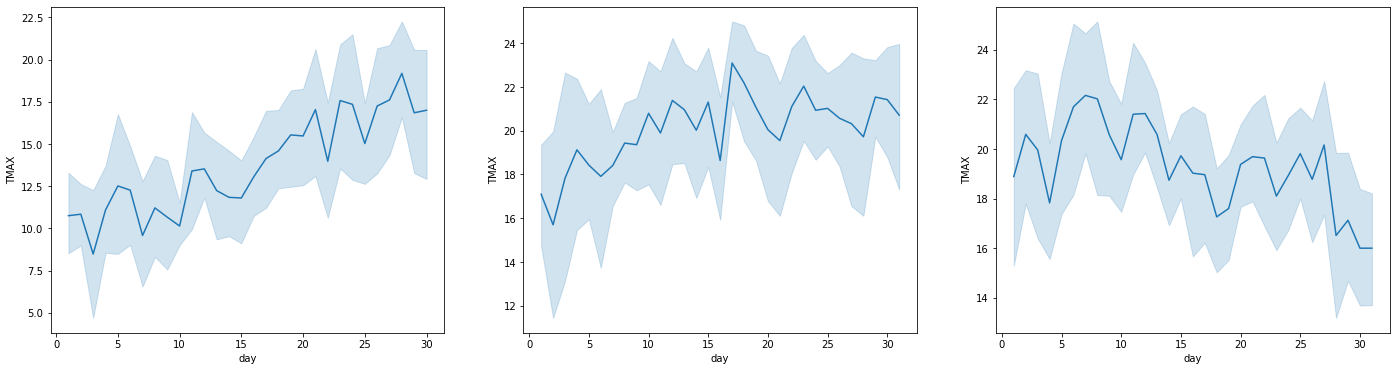

In [154]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMAX', data=bonavista[(bonavista['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMAX', data=bonavista[(bonavista['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMAX', data=bonavista[(bonavista['month']==8)])

## St. Johns

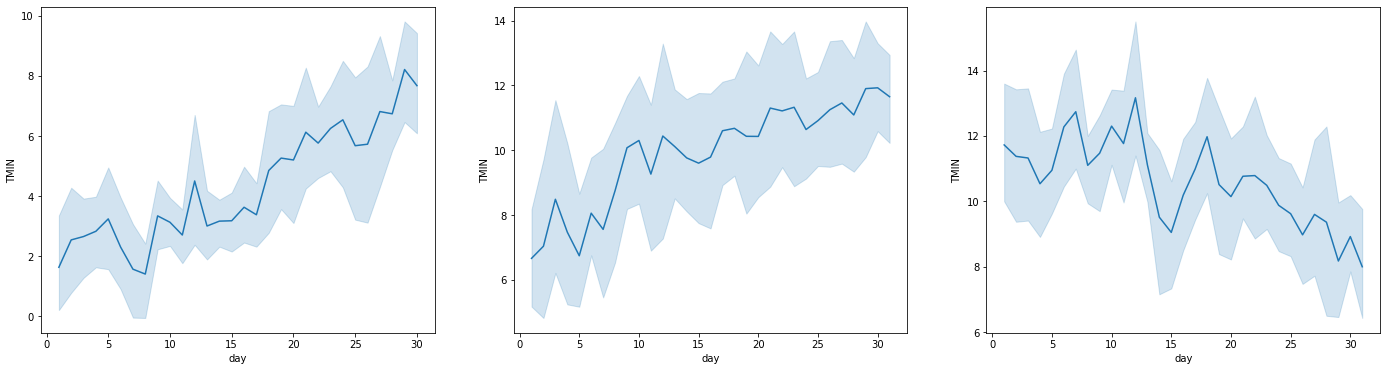

In [153]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMIN', data=st_johns[(st_johns['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMIN', data=st_johns[(st_johns['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMIN', data=st_johns[(st_johns['month']==8)])

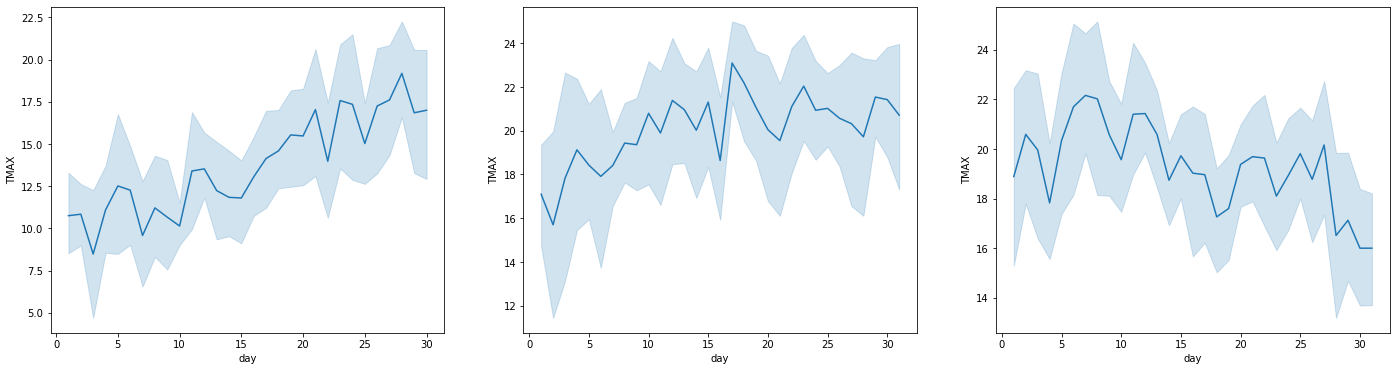

In [154]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.lineplot(x='day', y='TMAX', data=st_johns[(st_johns['month']==6)])

plt.subplot(1,3,2)
sns.lineplot(x='day', y='TMAX', data=st_johns[(st_johns['month']==7)])

plt.subplot(1,3,3)
sns.lineplot(x='day', y='TMAX', data=st_johns[(st_johns['month']==8)])

# Precipitation

## St.  Anthony

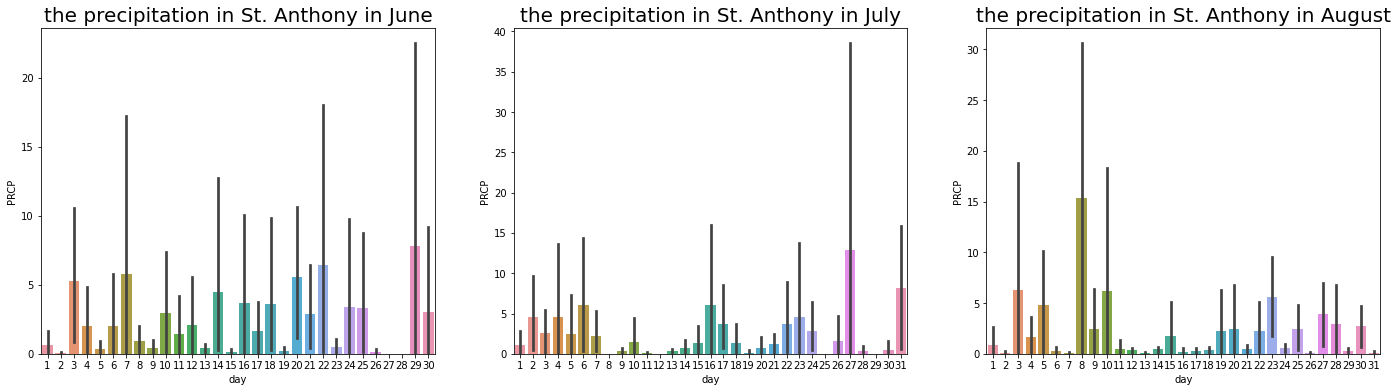

In [160]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.barplot(x='day', y='PRCP', data=st_anthony[(st_anthony['month']==6)])
plt.title('the precipitation in St. Anthony in June', fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x='day', y='PRCP', data=st_anthony[(st_anthony['month']==7)])
plt.title('the precipitation in St. Anthony in July', fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x='day', y='PRCP', data=st_anthony[(st_anthony['month']==8)])
plt.title('the precipitation in St. Anthony in August', fontsize=20)

plt.show()

## Deer Lake

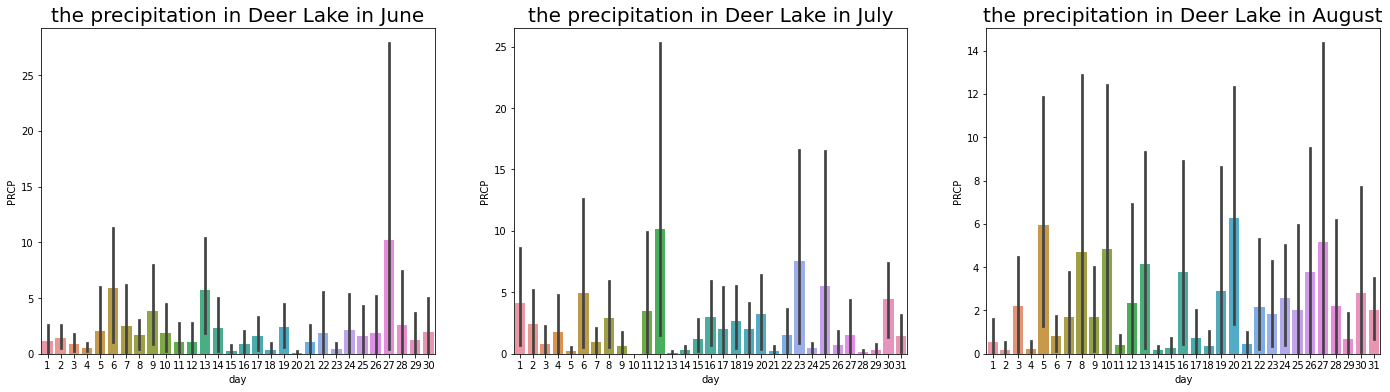

In [161]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.barplot(x='day', y='PRCP', data=deer[(deer['month']==6)])
plt.title('the precipitation in Deer Lake in June', fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x='day', y='PRCP', data=deer[(deer['month']==7)])
plt.title('the precipitation in Deer Lake in July', fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x='day', y='PRCP', data=deer[(deer['month']==8)])
plt.title('the precipitation in Deer Lake in August', fontsize=20)

plt.show()

## ISLE AUX MORTS

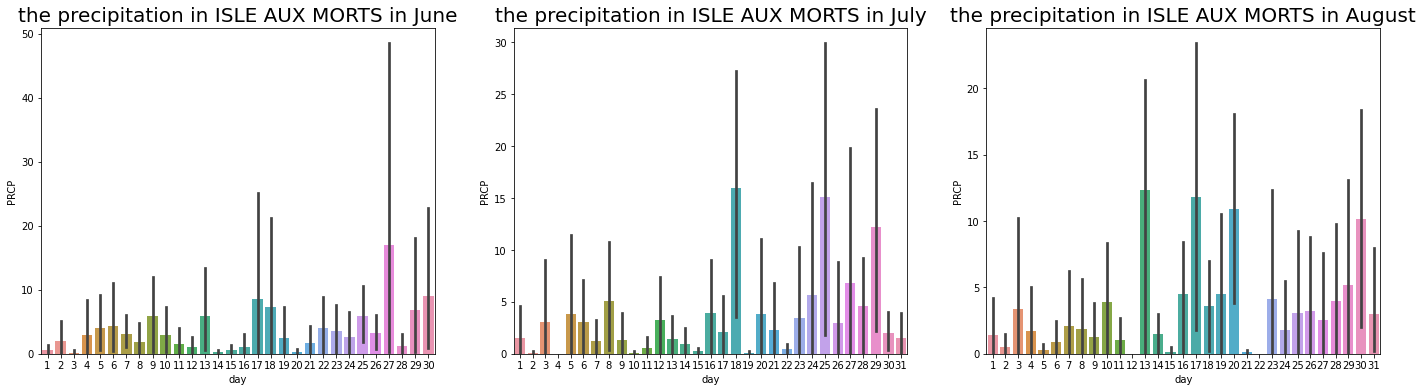

In [162]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.barplot(x='day', y='PRCP', data=isle[(isle['month']==6)])
plt.title('the precipitation in ISLE AUX MORTS in June', fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x='day', y='PRCP', data=isle[(isle['month']==7)])
plt.title('the precipitation in ISLE AUX MORTS in July', fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x='day', y='PRCP', data=isle[(isle['month']==8)])
plt.title('the precipitation in ISLE AUX MORTS in August', fontsize=20)

plt.show()

## Bonavista

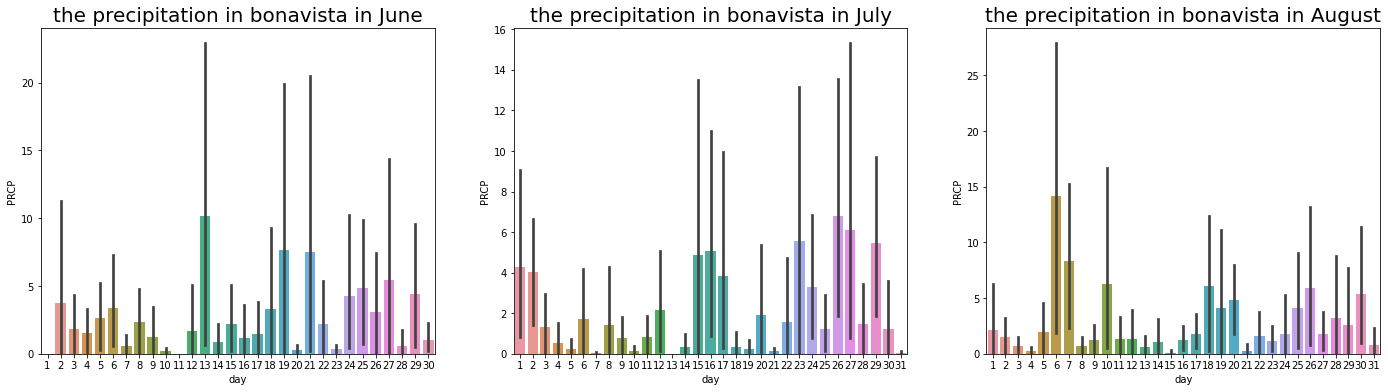

In [164]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.barplot(x='day', y='PRCP', data=bonavista[(bonavista['month']==6)])
plt.title('the precipitation in bonavista in June', fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x='day', y='PRCP', data=bonavista[(bonavista['month']==7)])
plt.title('the precipitation in bonavista in July', fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x='day', y='PRCP', data=bonavista[(bonavista['month']==8)])
plt.title('the precipitation in bonavista in August', fontsize=20)

plt.show()

## St. Johns

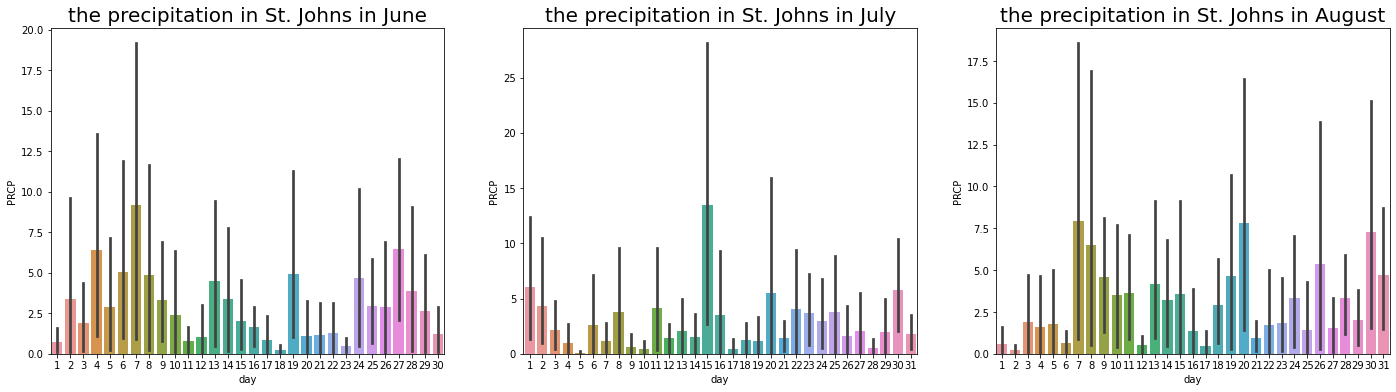

In [131]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.barplot(x='day', y='PRCP', data=st_johns[(st_johns['month']==6)])
plt.title('the precipitation in St. Johns in June', fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x='day', y='PRCP', data=st_johns[(st_johns['month']==7)])
plt.title('the precipitation in St. Johns in July', fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x='day', y='PRCP', data=st_johns[(st_johns['month']==8)])
plt.title('the precipitation in St. Johns in August', fontsize=20)

plt.show()